<a href="https://colab.research.google.com/github/StackDevPro/Data-Mining/blob/main/Gradient_Decent_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Google Drive

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing Necessary Libraries and Test Data:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/sem2/584/ass2/cleveland-train.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease::category|-1|1
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,-1
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,-1
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,-1
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,41,1,2,120,157,0,0,182,0,0.0,1,0,3,-1
148,59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
149,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
150,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


Renaming a Column

In [ ]:
df.rename(columns={'heartdisease::category|-1|1': 'target'}, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,-1
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,-1
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,-1
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,41,1,2,120,157,0,0,182,0,0.0,1,0,3,-1
148,59,1,4,164,176,1,2,90,0,1.0,2,2,6,1
149,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
150,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


Getting dummy values for columns that have values in a range

In [ ]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,0,0,0,1,0,0,1,0,1,0
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,-1,0,0,1,0,1,0,0,0,0,1
2,56,1,2,120,236,0,0,178,0,0.8,1,0,3,-1,0,1,0,0,1,0,0,1,0,0
3,57,0,4,120,354,0,0,163,1,0.6,1,0,3,-1,0,0,0,1,1,0,0,1,0,0
4,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,41,1,2,120,157,0,0,182,0,0.0,1,0,3,-1,0,1,0,0,1,0,0,1,0,0
148,59,1,4,164,176,1,2,90,0,1.0,2,2,6,1,0,0,0,1,0,1,0,0,1,0
149,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1,0,0,0,1,0,0,1,0,1,0
150,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1,0,0,0,1,0,0,1,0,1,0


In [ ]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,67,1,120,229,0,2,129,1,2.6,2,1,0,0,0,1,0,0,1,0,1,0
1,37,1,130,250,0,0,187,0,3.5,0,-1,0,0,1,0,1,0,0,0,0,1
2,56,1,120,236,0,0,178,0,0.8,0,-1,0,1,0,0,1,0,0,1,0,0
3,57,0,120,354,0,0,163,1,0.6,0,-1,0,0,0,1,1,0,0,1,0,0
4,63,1,130,254,0,2,147,0,1.4,1,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,41,1,120,157,0,0,182,0,0.0,0,-1,0,1,0,0,1,0,0,1,0,0
148,59,1,164,176,1,2,90,0,1.0,2,1,0,0,0,1,0,1,0,0,1,0
149,68,1,144,193,1,0,141,0,3.4,2,1,0,0,0,1,0,0,1,0,1,0
150,57,1,130,131,0,0,115,1,1.2,1,1,0,0,0,1,0,0,1,0,1,0


Scaling the Test data

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()


norm_df = pd.DataFrame(standard_scaler.fit_transform(df.drop('target',axis=1)))


norm_df['Target'] = df.target
norm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Target
0,1.398434,0.72111,-0.592770,-0.368334,-0.389249,1.093147,-0.876722,1.645393,1.473297,1.490092,-0.265372,-0.526603,-0.567221,1.054093,-1.068103,-0.265372,1.221394,-0.961276,1.082326,-0.250873,1
1,-1.980929,0.72111,-0.029990,0.002908,-0.389249,-0.920893,1.595825,-0.607758,2.303391,-0.719605,-0.265372,-0.526603,1.762983,-0.948683,0.936239,-0.265372,-0.818737,-0.961276,-0.923936,3.986087,-1
2,0.159334,0.72111,-0.592770,-0.244587,-0.389249,-0.920893,1.212154,-0.607758,-0.186893,-0.719605,-0.265372,1.898963,-0.567221,-0.948683,0.936239,-0.265372,-0.818737,1.040284,-0.923936,-0.250873,-1
3,0.271979,-1.38675,-0.592770,1.841436,-0.389249,-0.920893,0.572702,1.645393,-0.371358,-0.719605,-0.265372,-0.526603,-0.567221,1.054093,0.936239,-0.265372,-0.818737,1.040284,-0.923936,-0.250873,-1
4,0.947852,0.72111,-0.029990,0.073620,-0.389249,1.093147,-0.109380,-0.607758,0.366504,0.385243,-0.265372,-0.526603,-0.567221,1.054093,-1.068103,-0.265372,1.221394,-0.961276,1.082326,-0.250873,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-1.530347,0.72111,-0.592770,-1.641161,-0.389249,-0.920893,1.382674,-0.607758,-0.924755,-0.719605,-0.265372,1.898963,-0.567221,-0.948683,0.936239,-0.265372,-0.818737,1.040284,-0.923936,-0.250873,-1
148,0.497270,0.72111,1.883459,-1.305276,2.569047,1.093147,-2.539296,-0.607758,-0.002427,1.490092,-0.265372,-0.526603,-0.567221,1.054093,-1.068103,3.768289,-0.818737,-0.961276,1.082326,-0.250873,1
149,1.511079,0.72111,0.757901,-1.004748,2.569047,-0.920893,-0.365161,-0.607758,2.211159,1.490092,-0.265372,-0.526603,-0.567221,1.054093,-1.068103,-0.265372,1.221394,-0.961276,1.082326,-0.250873,1
150,0.271979,0.72111,-0.029990,-2.100794,-0.389249,-0.920893,-1.473544,1.645393,0.182038,0.385243,-0.265372,-0.526603,-0.567221,1.054093,-1.068103,-0.265372,1.221394,-0.961276,1.082326,-0.250873,1


Bifurcating features and label

In [ ]:
X = norm_df.iloc[:, :-1].values
y = norm_df.iloc[:, -1].values

Splitting the test data in 80:20 ratio

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

Implimenting our logistic regression model

In [ ]:
class LogisticRegresssion:

  def __init__(self, lr = 0.00001, max_iters=10000):
    self.lr = lr
    self.max_iters = max_iters
    self.weights = None
    self.bias = None
    self.tol = 0.001
  
  def fit(self, X,y):
    n, m = X.shape
    self.weights = np.zeros(m)
    self.bias = 0

    cost_list = []

    for _ in range(self.max_iters):
      model = np.dot(X, self.weights) + self.bias
      y_pred = self.sigmoid(model)

      cost_function = (1/n) * np.sum(np.log(1 + np.exp(-y * np.dot(self.weights, X.T))))

      dw = (1 / n) * np.dot(X.T,(y_pred - y))
      db = (1 / n) * np.sum(y_pred -y)

      self.weights -= self.lr * dw
      self.bias -= self.lr * db

      if self.weights.any() < self.tol:
        return cost_list

      cost_list.append(cost_function)
    return cost_list


  def predict(self,X):
    model = np.dot(X, self.weights) + self.bias
    y_pred = self.sigmoid(model)
    y_pred_cls = [1 if i>0.5 else -1 for i in y_pred]
    return y_pred_cls

  def sigmoid(self,x):
    return 1 /(1+ np.exp(-x))


In [ ]:
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

Fitting our model and testing

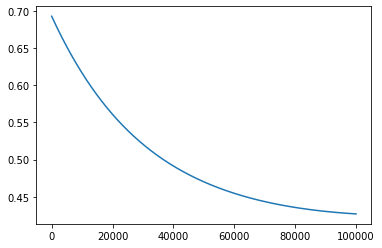

Logistic Regression classification accuracy: 0.8709677419354839
Classification error obtained: 0.12903225806451613
CPU times: user 9.14 s, sys: 15.9 ms, total: 9.16 s
Wall time: 9.89 s


In [ ]:
%%time
lr = LogisticRegresssion(0.00001, 100000)

cost_list = lr.fit(X_train, y_train)

plt.plot(np.arange(100000), cost_list)
plt.show()

prediction = lr.predict(X_test)

Accuracy = accuracy(y_test, prediction)

Classification_error= 1-Accuracy

print("Logistic Regression classification accuracy:", Accuracy)
print("Classification error obtained:",Classification_error)

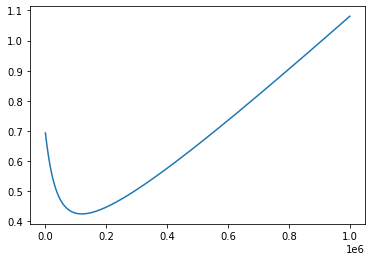

Logistic Regression classification accuracy: 0.8387096774193549
Classification error obtained: 0.16129032258064513
CPU times: user 1min 13s, sys: 387 ms, total: 1min 13s
Wall time: 1min 14s


In [ ]:
%%time
lr = LogisticRegresssion(0.00001, 1000000)

cost_list = lr.fit(X_train, y_train)

plt.plot(np.arange(1000000), cost_list)
plt.show()

prediction = lr.predict(X_test)

Accuracy = accuracy(y_test, prediction)

Classification_error= 1-Accuracy

print("Logistic Regression classification accuracy:", Accuracy)
print("Classification error obtained:",Classification_error)

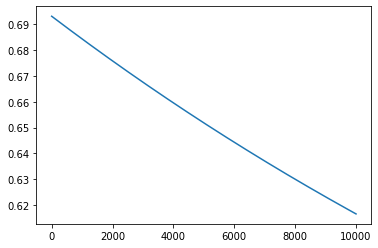

Logistic Regression classification accuracy: 0.8387096774193549
Classification error obtained: 0.16129032258064513
CPU times: user 1.87 s, sys: 4.73 ms, total: 1.87 s
Wall time: 2.06 s


In [ ]:
%%time
lr = LogisticRegresssion(0.00001, 10000)

cost_list = lr.fit(X_train, y_train)

plt.plot(np.arange(10000), cost_list)
plt.show()

prediction = lr.predict(X_test)

Accuracy = accuracy(y_test, prediction)

Classification_error= 1-Accuracy

print("Logistic Regression classification accuracy:", Accuracy)
print("Classification error obtained:",Classification_error)

Getting a classification report for our model

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,prediction)
print(confusion_matrix)


[[19  3]
 [ 2  7]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

          -1       0.90      0.86      0.88        22
           1       0.70      0.78      0.74         9

    accuracy                           0.84        31
   macro avg       0.80      0.82      0.81        31
weighted avg       0.85      0.84      0.84        31



Importing sklearns built in logistic regression model to compare accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
print("Logistic Regression accuracy:", accuracy(y_test, y_pred))

Logistic Regression accuracy: 0.7741935483870968


Importing Test Data

In [ ]:
test_data= pd.read_csv("/content/gdrive/MyDrive/sem2/584/ass2/cleveland-test.csv")

In [ ]:
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3
3,62,0,4,140,268,0,2,160,0,3.6,3,2,3
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,56,1,2,130,221,0,2,163,0,0.0,1,0,7
141,67,1,3,152,212,0,2,150,0,0.8,2,0,7
142,44,1,4,120,169,0,0,144,1,2.8,3,0,6
143,57,0,4,140,241,0,0,123,1,0.2,2,0,7


Getting dummy values for columns that have values in a range

In [ ]:
a = pd.get_dummies(test_data['cp'], prefix = "cp")
b = pd.get_dummies(test_data['thal'], prefix = "thal")
c = pd.get_dummies(test_data['slope'], prefix = "slope")
frames = [test_data, a, b, c]
test_data = pd.concat(frames, axis = 1)
test_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,1,0,0,0,0,1,0,0,0,1
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,0,0,0,1,1,0,0,0,1,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,1,0,0,1,0,0,1,0,0
3,62,0,4,140,268,0,2,160,0,3.6,3,2,3,0,0,0,1,1,0,0,0,0,1
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,56,1,2,130,221,0,2,163,0,0.0,1,0,7,0,1,0,0,0,0,1,1,0,0
141,67,1,3,152,212,0,2,150,0,0.8,2,0,7,0,0,1,0,0,0,1,0,1,0
142,44,1,4,120,169,0,0,144,1,2.8,3,0,6,0,0,0,1,0,1,0,0,0,1
143,57,0,4,140,241,0,0,123,1,0.2,2,0,7,0,0,0,1,0,0,1,0,1,0


In [ ]:
test_data = test_data.drop(columns = ['cp', 'thal', 'slope'])
test_data

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,cp_1,cp_2,cp_3,cp_4,thal_3,thal_6,thal_7,slope_1,slope_2,slope_3
0,63,1,145,233,1,2,150,0,2.3,0,1,0,0,0,0,1,0,0,0,1
1,67,1,160,286,0,2,108,1,1.5,3,0,0,0,1,1,0,0,0,1,0
2,41,0,130,204,0,2,172,0,1.4,0,0,1,0,0,1,0,0,1,0,0
3,62,0,140,268,0,2,160,0,3.6,2,0,0,0,1,1,0,0,0,0,1
4,53,1,140,203,1,2,155,1,3.1,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,56,1,130,221,0,2,163,0,0.0,0,0,1,0,0,0,0,1,1,0,0
141,67,1,152,212,0,2,150,0,0.8,0,0,0,1,0,0,0,1,0,1,0
142,44,1,120,169,0,0,144,1,2.8,0,0,0,0,1,0,1,0,0,0,1
143,57,0,140,241,0,0,123,1,0.2,0,0,0,0,1,0,0,1,0,1,0


Scaling Test data

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()


norm_test = pd.DataFrame(standard_scaler.fit_transform(test_data))
norm_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.924685,0.660033,0.686403,-0.253188,2.303117,0.930138,0.016386,-0.793230,0.958821,-0.725689,3.186510,-0.352180,-0.681650,-0.966092,-1.157026,4.138236,-0.770329,-0.914026,-0.926809,3.329164
1,1.359655,0.660033,1.538044,0.889356,-0.434194,0.930138,-1.866466,1.260669,0.313675,2.369162,-0.313823,-0.352180,-0.681650,1.035098,0.864285,-0.241649,-0.770329,-0.914026,1.078971,-0.300376
2,-1.467648,-1.515076,-0.165238,-0.878354,-0.434194,0.930138,1.002642,-0.793230,0.233031,-0.725689,-0.313823,2.839454,-0.681650,-0.966092,0.864285,-0.241649,-0.770329,1.094061,-0.926809,-0.300376
3,0.815943,-1.515076,0.402523,0.501322,-0.434194,0.930138,0.464684,-0.793230,2.007184,1.337545,-0.313823,-0.352180,-0.681650,1.035098,0.864285,-0.241649,-0.770329,-0.914026,-0.926809,3.329164
4,-0.162739,0.660033,0.402523,-0.899912,2.303117,0.930138,0.240535,1.260669,1.603967,-0.725689,-0.313823,-0.352180,-0.681650,1.035098,-1.157026,-0.241649,1.298147,-0.914026,-0.926809,3.329164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.163489,0.660033,-0.165238,-0.511878,-0.434194,0.930138,0.599174,-0.793230,-0.895975,-0.725689,-0.313823,2.839454,-0.681650,-0.966092,-1.157026,-0.241649,1.298147,1.094061,-0.926809,-0.300376
141,1.359655,0.660033,1.083836,-0.705895,-0.434194,0.930138,0.016386,-0.793230,-0.250828,-0.725689,-0.313823,-0.352180,1.467029,-0.966092,-1.157026,-0.241649,1.298147,-0.914026,1.078971,-0.300376
142,-1.141420,0.660033,-0.732999,-1.632865,-0.434194,-1.097983,-0.252593,1.260669,1.362037,-0.725689,-0.313823,-0.352180,-0.681650,1.035098,-1.157026,4.138236,-0.770329,-0.914026,-0.926809,3.329164
143,0.272231,-1.515076,0.402523,-0.080729,-0.434194,-1.097983,-1.194019,1.260669,-0.734688,-0.725689,-0.313823,-0.352180,-0.681650,1.035098,-1.157026,-0.241649,1.298147,-0.914026,1.078971,-0.300376


In [ ]:
predictions = lr.predict(norm_test)

In [ ]:
print(predictions)

[1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, -1]


Writing the predictions to a file

In [ ]:
f = open("Simran584_hw2.dat", "a")
for i in predictions:
  f.write(str(i))
  f.write("\n")
f.close()

In [ ]:
f = open("Simran584_hw2.dat","r")
for i in f:
    print(i)
f.close()

1

1

-1

1

1

1

-1

-1

-1

1

-1

-1

-1

1

1

-1

1

-1

-1

1

-1

-1

1

1

-1

-1

1

-1

-1

-1

1

-1

-1

1

-1

1

-1

-1

1

-1

-1

1

-1

-1

-1

-1

-1

1

-1

-1

1

-1

-1

-1

1

1

-1

1

1

1

1

-1

1

-1

-1

-1

-1

-1

-1

1

1

-1

-1

1

1

-1

-1

1

1

1

1

-1

-1

1

-1

-1

-1

1

-1

1

-1

-1

1

-1

-1

-1

1

-1

1

1

-1

-1

-1

1

1

1

1

-1

-1

-1

-1

1

-1

-1

1

-1

-1

1

-1

1

1

-1

-1

-1

-1

-1

-1

-1

-1

1

-1

1

-1

1

-1

-1

-1

1

1

1

-1

1

1

1

-1

